# Что делать
Построить 5 графиков по выбранным данным. 
Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 
Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

Откуда брать данные
Можно взять свой датасет или воспользоваться одним из приведенных ниже:
•	Данные IMDB;
•	Данные NYC;
•	Данные NBA.
https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?pn=1

In [1]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

# импортируем нужные библиотеки
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_air_delay = pd.read_csv('671827460_62019_445_airline_delay_causes.csv')
#данные уже сгруппированы в динамические ряды по авиакомпаниям и аэропортам
#data_air_delay.info()
#data_air_delay.head()

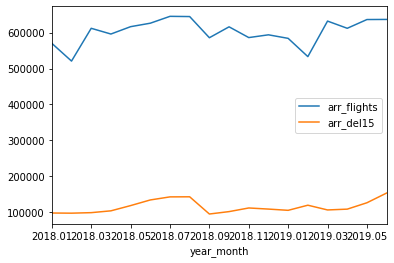

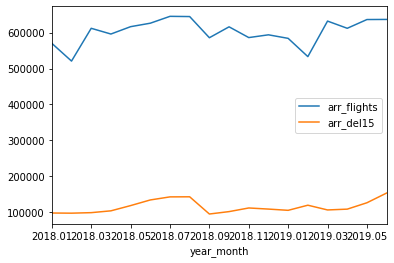

In [3]:
# Динамика задержки рейсов по месяцам в сравнении с динамикой общего количества рейсов. Для выявления сезонности.
# Численные дискретные величины.


data_air_delay['year_month'] = data_air_delay['year'].astype(str) + '.' + data_air_delay[' month'].astype(str)

data_air_delay['year_month'] = pd.to_datetime(data_air_delay['year_month']).dt.strftime('%Y.%m')

#data.sort_values(by=['country', 'year', 'quantity'], ascending=[True, True, False], inplace=True)
data_air_delay_dynamics = data_air_delay.groupby('year_month')['arr_flights', 'arr_del15'].sum()

data_air_delay_dynamics
data_air_delay_dynamics.plot()


<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

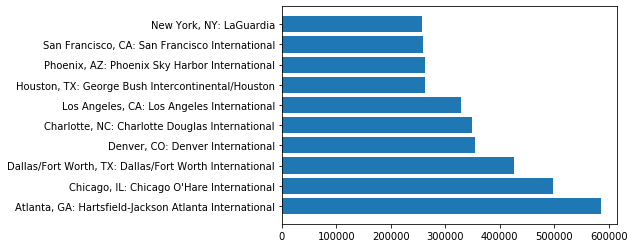

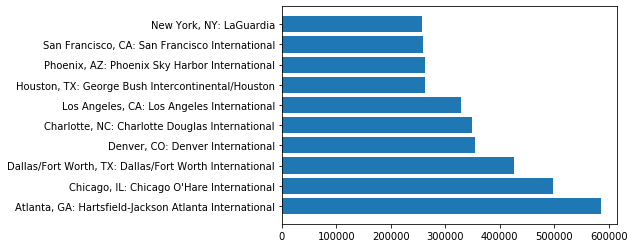

In [4]:
# Топ 10 аэропортов по количеству рейсов
# Численная дискретная величина.

data_air_delay_top_airports = data_air_delay[['airport_name','arr_flights']].\
           groupby(['airport_name']).sum().sort_values('arr_flights', ascending=False).reset_index().head(10)
#data_air_delay_top_airports
plt.barh(data_air_delay_top_airports['airport_name'], data_air_delay_top_airports['arr_flights'])

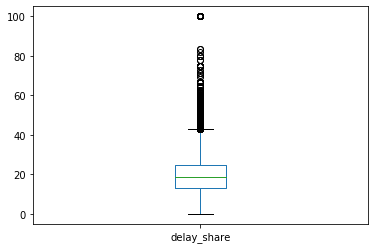

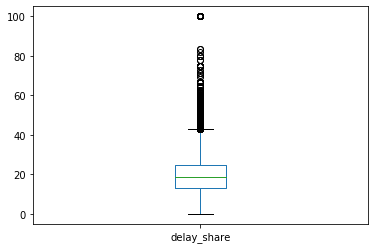

In [5]:
# Распределение доли задержанных рейсов
# Для выявления какова медианная доля задержек, насколько велик разброс доли задержек. Сравнение доли задержек рейсов и их распределения по перевозчикам.
# Численная непрерывая величина

data_air_delay['delay_share'] = data_air_delay['arr_del15']/data_air_delay['arr_flights']*100
data_air_delay['delay_share'].plot(kind = 'box')


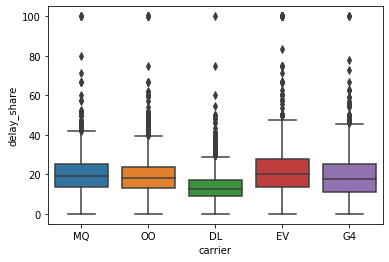

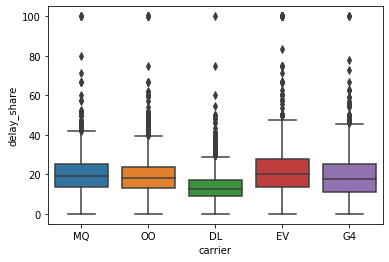

In [9]:
# Распределение доли задержанных рейсов по топ 5 перевозчикам
top_carrier = data_air_delay.carrier.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(x='carrier', y='delay_share', 
            data=data_air_delay[data_air_delay.carrier.isin(top_carrier)])

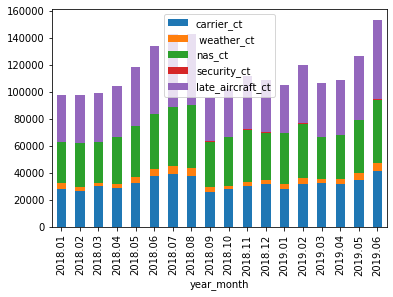

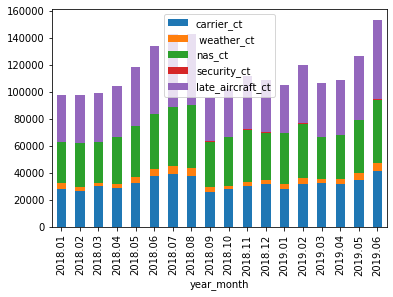

In [7]:
# Распределение доли задержанных рейсов
# Для анализа динамики задержек рейсов с распределением по причинам задержки (удельного веса в общем количестве задержек).
# Численная дискретная величина - количество задержек, удельный вес каждой причины в общем количестве  - непрерывная величина.



data_air_delay_reasons = data_air_delay[[x for x in data_air_delay.columns if '_ct' in x] + ['year_month']]\
    .groupby('year_month').sum()

data_air_delay_reasons.plot(kind='bar', rot=90, stacked=True)


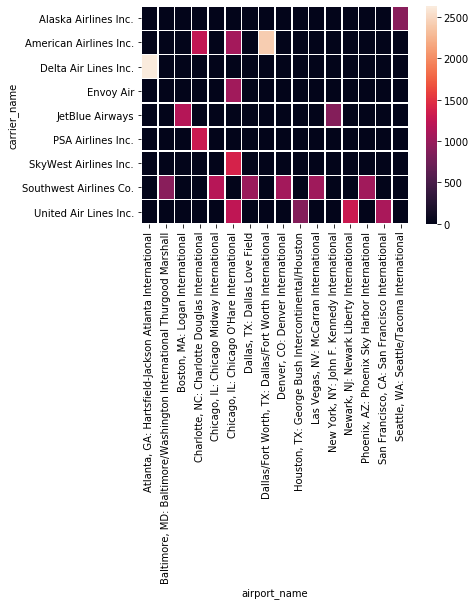

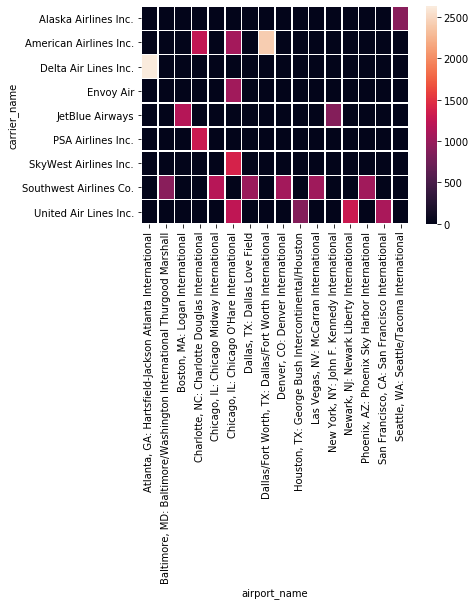

In [8]:
#Распределение топ 20 задержек по авиакомпаниям и аэропортам
#Выявление аномальных по количеству задержек аэропортов и перевозчиков.
#Численная дискретная величина


data_air_delay_top = data_air_delay[['airport_name', 'carrier_name','arr_del15']].\
         groupby(['carrier_name', 'airport_name']).mean().sort_values('arr_del15', ascending=False).head(20)

data_air_delay_heat = data_air_delay_top.pivot_table(
                        index='carrier_name', 
                        columns='airport_name', 
                        values='arr_del15', 
                        aggfunc= sum).fillna(0).applymap(float)

    
sns.heatmap(data_air_delay_heat, linewidths=0.5)
